<h1>Анализ клиентской базы</h1>

<p>В данном ноутбуке проанализирована клиентская база по возрасту, полу и.т.д</p>
<p>Также построены графики зависимостей и выявлены оптимальный тарифы для каждого из типов пользователя</p>
<p>Для удобства все данные, включая названия столбцов будет переведены на русский язык</p>

In [2]:
import pandas as pd

data_train = pd.read_csv("../data/train_raw.csv")
data_test = pd.read_csv("../data/test_raw.csv")
data = pd.concat([data_train, data_test], ignore_index=True)
print(data)

        CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              1.0  22.0  Female    25.0             14.0            4.0   
1              2.0  41.0  Female    28.0             28.0            7.0   
2              3.0  47.0    Male    27.0             10.0            2.0   
3              4.0  35.0    Male     9.0             12.0            5.0   
4              5.0  53.0  Female    58.0             24.0            9.0   
...            ...   ...     ...     ...              ...            ...   
505202    449995.0  42.0    Male    54.0             15.0            1.0   
505203    449996.0  25.0  Female     8.0             13.0            1.0   
505204    449997.0  26.0    Male    35.0             27.0            1.0   
505205    449998.0  28.0    Male    55.0             14.0            2.0   
505206    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0              

<h2>Предварительная обработка данных</h2>

<h3>Перевод данных на русский язык</h3>

In [3]:
data.columns = ["Клиент_ID", "Возраст", "Пол", "Время владения", "Частота использования", "Количество звонков в тех.поддержку", "Задержка оплаты", "Тип подписки", "Продолжительность подписки", "Всего потрачено", "Последнее взаимодействие", "Исход"]
replacements = {
    "Female": "Женский",
    "Male": "Мужской",
    "Basic": "Базовая",
    "Standard": "Стандартная",
    "Premium": "Премиальная",
    "Monthly": "Один месяц",
    "Quarterly": "Три месяца",
    "Annual": "Один год",
}
data.replace(replacements, inplace=True)
print(data)

        Клиент_ID  Возраст      Пол  Время владения  Частота использования  \
0             1.0     22.0  Женский            25.0                   14.0   
1             2.0     41.0  Женский            28.0                   28.0   
2             3.0     47.0  Мужской            27.0                   10.0   
3             4.0     35.0  Мужской             9.0                   12.0   
4             5.0     53.0  Женский            58.0                   24.0   
...           ...      ...      ...             ...                    ...   
505202   449995.0     42.0  Мужской            54.0                   15.0   
505203   449996.0     25.0  Женский             8.0                   13.0   
505204   449997.0     26.0  Мужской            35.0                   27.0   
505205   449998.0     28.0  Мужской            55.0                   14.0   
505206   449999.0     31.0  Мужской            48.0                   20.0   

        Количество звонков в тех.поддержку  Задержка оплаты Тип

<h3>Удаление нулевых значений</h3>

In [4]:
data.dropna(inplace=True)

<h2>Анализ клиентов</h2>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Анализ возрастов</h3>

In [6]:
print(data["Возраст"].describe())

count    505206.000000
mean         39.704172
std          12.670577
min          18.000000
25%          29.000000
50%          40.000000
75%          49.000000
max          65.000000
Name: Возраст, dtype: float64


In [13]:
ages_top = data["Возраст"].value_counts()

#print(ages_top.iloc[0:10])
#print(ages_top.iloc[len(ages_top)-10:len(ages_top)])
print(ages_top.iloc[int(len(ages_top)/2)-10:int(len(ages_top)/2)])

37.0    12391
35.0    12353
39.0    12310
33.0    12247
30.0    12231
34.0    12171
32.0    12169
25.0    10995
26.0    10973
20.0    10941
Name: Возраст, dtype: int64


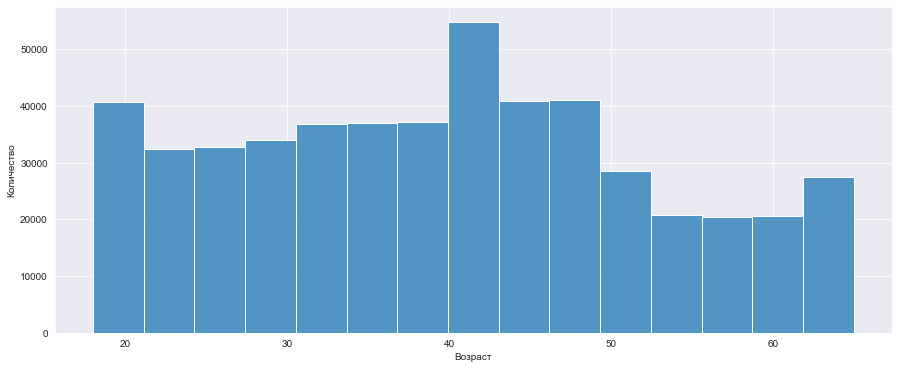

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.histplot(data["Возраст"], bins=15)
plt.ylabel("Количество")
plt.show()

<h4>Итоги:</h4>
<ol>
<li>Топ <b>10</b> наиболее <b>распространенных</b> возрастов среди клиентов - от <b>40 до 50 лет</b></li>
<li>Топ <b>10</b> возрастов <b>средней частоты упоминания</b> среди клиентов - от <b>20 до 30 лет</b></li>
<li>Топ <b>10</b> наиболее <b>нерапространенных</b> возрастов среди клиентов - от <b>50 до 60 лет</b></li>
</ol>
<ol>
<li><b>Средний</b> возраст среди клиентов <b>~40 лет</b></li>
<li><b>Максимальный</b> возраст среди клиентов <b>65 лет</b></li>
<li><b>Минимальный</b> возраст среди клиентов <b>18 лет</b></li>
</ol>
<p></p>

<h3>Анализ полов</h3>

In [14]:
print(data["Пол"].describe())

count      505206
unique          2
top       Мужской
freq       280273
Name: Пол, dtype: object


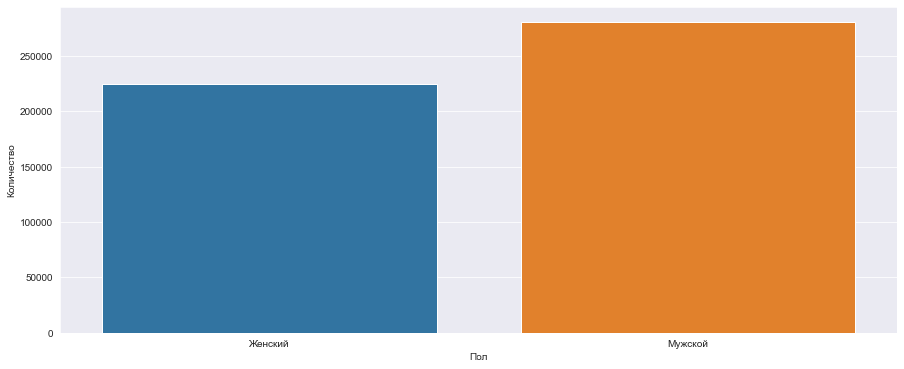

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="Пол")
plt.ylabel("Количество")
plt.show()

In [24]:
num_men = len(data[data["Пол"] == "Мужской"])
num_women = len(data[data["Пол"] == "Женский"])

print(f"{round((num_men*100)/len(data), 2)}%")
print(f"{round((num_women*100)/len(data), 2)}%")

55.48%
44.52%


<h4>Итоги:</h4>
<ol>
<li>Наиболее <b>распространенный</b> пол среди клиентов - <b>мужской</b> - <b>55.48%</b> от общего числа</li>
<li>Наиболее <b>нераспространенный</b> пол среди клиентов - <b>женский</b> - <b>44.52%</b> от общего числа</li>
</ol>